In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [37]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [39]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [40]:
iris_df.duplicated().sum()

1

In [41]:
iris_df = iris_df.drop_duplicates()
iris_df.duplicated().sum()

0

In [42]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    silhouette_scores.append(silhouette_score(iris_df, kmeans.labels_))

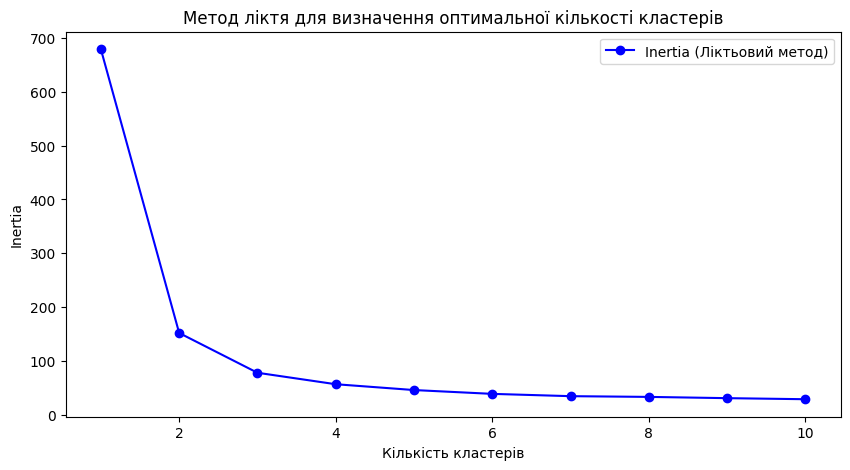

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, 'bo-', label='Inertia (Ліктьовий метод)')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.legend()
plt.show()

Метод ліктя продемонстрував оптимальну кількість кластерів , що дорівнює 2

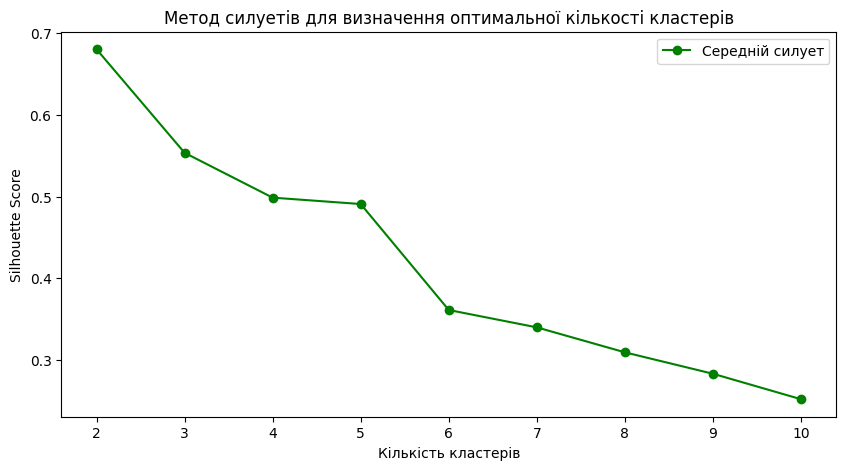

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, 'go-', label='Середній силует')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.legend()
plt.show()

Метод силуетів продемонстрував оптимальну кількість кластерів , що дорівнює 2

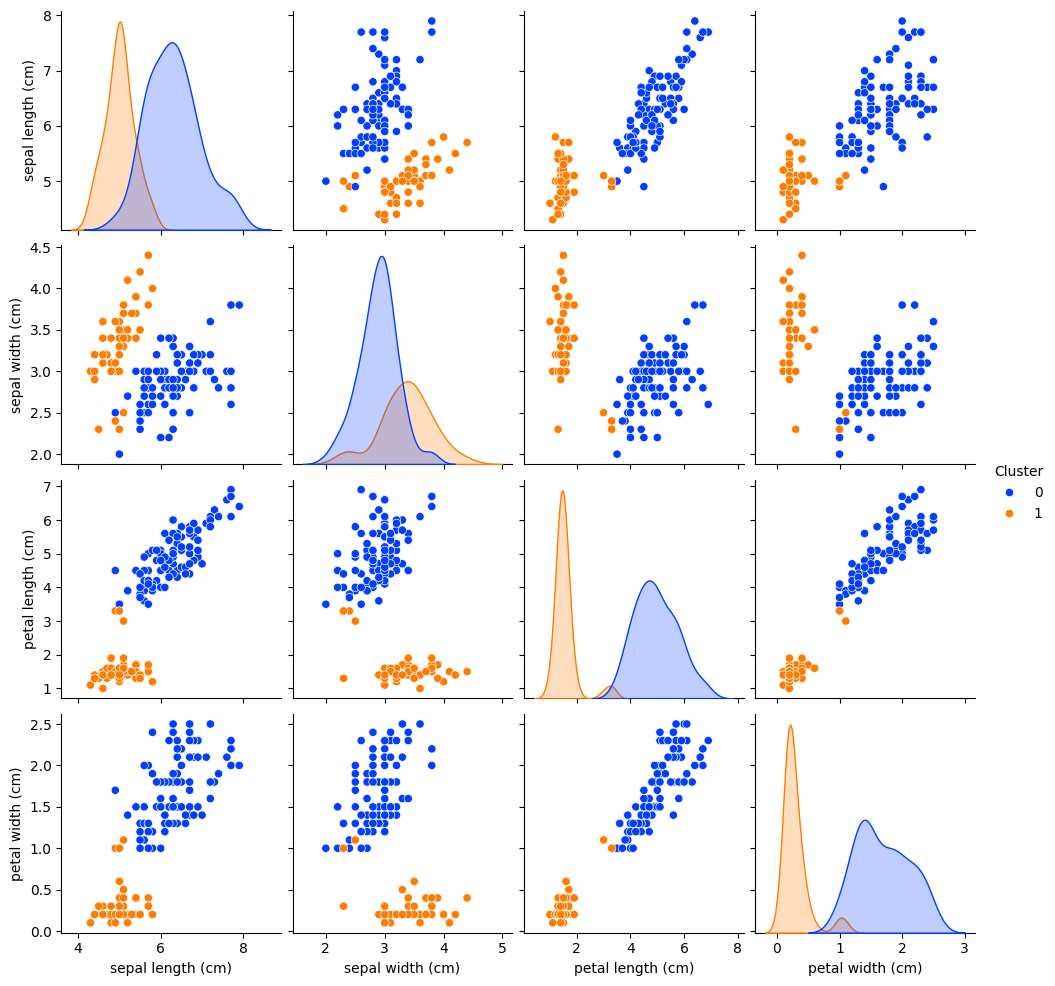

In [48]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(iris_df)
sns.pairplot(iris_df, hue='Cluster', palette='bright')
plt.show()

Дані успішно поділились на 2 кластери, які чітко розрізняються за параметрами пелюсток (petal length та petal width). Кластер 0 має більші значення цих параметрів, тоді як кластер 1 — значно менші. 